# Image Data Augmentation Exercise : **CIFAR-100**
---
## 데이터가 더 부족한 세상으로!

[여기 참고](https://www.cs.toronto.edu/~kriz/cifar.html)

## Keras Update

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

## Data Loading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets.cifar100 import load_data

In [ ]:
(train_x, train_y), (test_x, test_y) = load_data()
# (train_x, train_y), (test_x, test_y) = load_data(label_mode='coarse')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 69s 0us/step


In [ ]:
np.unique(train_y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
label_dict = {0:'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle',
              10: 'bowl', 11: 'boy',12: 'bridge',13: 'bus',14: 'butterfly',15: 'camel',16: 'can',17: 'castle',18: 'caterpillar',19: 'cattle',
              20: 'chair',21: 'chimpanzee',22: 'clock',23: 'cloud',24: 'cockroach',25: 'couch',26: 'cra',27: 'crocodile',28: 'cup',29: 'dinosaur',
              30: 'dolphin',31: 'elephant',32: 'flatfish',33: 'forest',34: 'fox',35: 'girl',36: 'hamster',37: 'house',38: 'kangaroo',39: 'keyboard',
              40: 'lamp',41: 'lawn_mower',42: 'leopard',43: 'lion',44: 'lizard',45: 'lobster',46: 'man',47: 'maple_tree',48: 'motorcycle',49: 'mountain',
              50: 'mouse',51: 'mushroom',52: 'oak_tree',53: 'orange',54: 'orchid',55: 'otter',56: 'palm_tree',57: 'pear',58: 'pickup_truck',59: 'pine_tree',
              60: 'plain',61: 'plate',62: 'poppy',63: 'porcupine',64: 'possum',65: 'rabbit',66: 'raccoon',67: 'ray',68: 'road',69: 'rocket',
              70: 'rose',71: 'sea',72: 'seal',73: 'shark',74: 'shrew',75: 'skunk',76: 'skyscraper',77: 'snail',78: 'snake',79: 'spider',
              80: 'squirrel',81: 'streetcar',82: 'sunflower',83: 'sweet_pepper',84: 'table',85: 'tank',86: 'telephone',87: 'television',88: 'tiger',89: 'tractor',
              90: 'train',91: 'trout',92: 'tulip',93: 'turtle',94: 'wardrobe',95: 'whale',96: 'willow_tree',97: 'wolf',98: 'woman',99: 'worm'
            }

label_dict[0]

'apple'

* 데이터 살펴보기

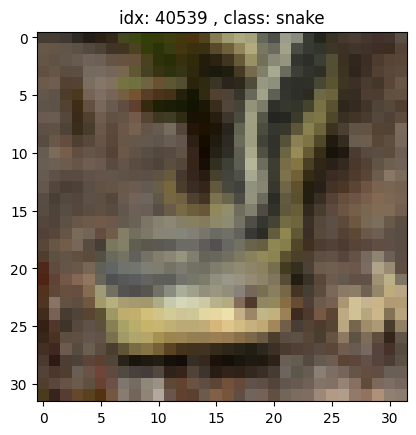

In [ ]:
rand_i = np.random.randint(0, train_x.shape[0])

plt.title(f'idx: {rand_i} , class: { label_dict[train_y[rand_i][0]] }')
plt.imshow( train_x[rand_i] )
plt.show()

In [ ]:
rows = 5
fig, axes = plt.subplots(rows, len(label_dict), figsize=(len(label_dict), rows) )

for img_id in range(len(label_dict)) :
    imgs = train_x[train_y.reshape(-1)==img_id]
    imgs_len = len(imgs)

    for row_i in range(rows) :
        axe = axes[row_i, img_id]
        axe.imshow( imgs[np.random.randint(imgs_len)], interpolation='none' )
        axe.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Data Preprocessing

* Data split
    - training set : test set = 8 : 2
    - training set : validation set = 8 : 2
    - 재현을 위한 난수 고정 : 2024

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=.2, random_state=2024)

In [ ]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

* Scaling

    - min-max scaling (선택사항)
        1. RGB 정보 전체를 min-max
        2. R 따로 G 따로 B 따로 min-max, 그 후 하나로 통합

In [ ]:
min_n, max_n = train_x.min(), train_x.max()

In [ ]:
train_x = (train_x - min_n) / (max_n - min_n)
val_x = (val_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [ ]:
train_x.min(), train_x.max()

(0.0, 1.0)

* One-hot encoding

In [ ]:
# from keras.utils import to_categorical

In [ ]:
# train_y = to_categorical(train_y, 100)
# val_y = to_categorical(val_y, 100)
# test_y = to_categorical(test_y, 100)

* Data shape 재확인

In [ ]:
train_x.shape, train_y.shape

((40000, 32, 32, 3), (40000, 1))

## Modeling : CNN

- 조건
    1. Sequential API, Functiona API 중 택일.
    2. Image Augmentation Layer를 최소 하나 이상 넣을 것! : [공식 문서 참고](https://keras.io/api/layers/preprocessing_layers/)
    3. [이 구조를 미니 버전으로 활용해봐도 좋다.](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99DFA5415B38AC752E)
    4. DropOut, BatchNormalization 등의 기능도 같이 활용해보자.
    5. Early Stopping을 사용할 것.

In [ ]:
import keras

from keras.utils import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, RandomFlip

In [ ]:
## Sequential API
# 1. 세션 클리어
clear_session()

# 2. 모델 선언
model = Sequential()

# 3. 레이어 조립
model.add( Input(shape=(32, 32, 3)))
####################################
# Augmentation Layer
model.add( RandomFlip(mode='vertical'))
####################################

model.add( Conv2D(filters=64, # 서로 다른 64개의 filter를 사용하여 새로운 feature map을 만듦
                  kernel_size = (3,3), # Conv2D filter의 가로세로 사이즈
                  strides=(1,1), # Conv2D filter의 이동보폭
                  padding='same', # feature map 크기 유지 및 외곽 정보 더 반영
                  activation='relu'))
model.add( Conv2D(filters=64, # 서로 다른 64개의 filter를 사용하여 새로운 feature map을 만듦
                  kernel_size = (3,3), # Conv2D filter의 가로세로 사이즈
                  strides=(1,1), # Conv2D filter의 이동보폭
                  padding='same', # feature map 크기 유지 및 외곽 정보 더 반영
                  activation='relu'))
model.add( MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                     strides=(2,2)))  # pool filter의 이동 보폭
model.add( BatchNormalization())
model.add (Dropout(0.4))

model.add( Conv2D(filters=128, # 서로 다른 128개의 filter를 사용하여 새로운 feature map을 만듦
                  kernel_size = (3,3), # Conv2D filter의 가로세로 사이즈
                  strides=(1,1), # Conv2D filter의 이동보폭
                  padding='same', # feature map 크기 유지 및 외곽 정보 더 반영
                  activation='relu'))
model.add( Conv2D(filters=128, # 서로 다른 128개의 filter를 사용하여 새로운 feature map을 만듦
                  kernel_size = (3,3), # Conv2D filter의 가로세로 사이즈
                  strides=(1,1), # Conv2D filter의 이동보폭
                  padding='same', # feature map 크기 유지 및 외곽 정보 더 반영
                  activation='relu'))
model.add( MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                     strides=(2,2)))  # pool filter의 이동 보폭
model.add( BatchNormalization())
model.add (Dropout(0.4))

model.add( Conv2D(filters=256, # 서로 다른 256개의 filter를 사용하여 새로운 feature map을 만듦
                  kernel_size = (3,3), # Conv2D filter의 가로세로 사이즈
                  strides=(1,1), # Conv2D filter의 이동보폭
                  padding='same', # feature map 크기 유지 및 외곽 정보 더 반영
                  activation='relu'))
model.add( Conv2D(filters=256, # 서로 다른 256개의 filter를 사용하여 새로운 feature map을 만듦
                  kernel_size = (3,3), # Conv2D filter의 가로세로 사이즈
                  strides=(1,1), # Conv2D filter의 이동보폭
                  padding='same', # feature map 크기 유지 및 외곽 정보 더 반영
                  activation='relu'))
model.add( MaxPool2D(pool_size=(2,2), # pooling filter의 가로세로 사이즈
                     strides=(2,2)))  # pool filter의 이동 보폭
model.add( BatchNormalization())
model.add (Dropout(0.4))


model.add( Flatten())
model.add( Dense(100, activation='softmax'))

# 4. 컴파일
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         409,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,556,900 (5.94 MB)

 Trainable params: 1,556,004 (5.94 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
## Functional API
# 1 세션 클리어
clear_session()

# 2 레이어 연결
il = Input(shape=(32,32,3))
###########################
al = RandomFlip(mode='vertical')(il)
###########################

hl = Conv2D(64, (3,3), (1,1), 'same', activation='relu')(al)
hl = Conv2D(64, (3,3), (1,1), 'same', activation='relu')(hl)
hl = MaxPool2D((2,2), (2,2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)

hl = Conv2D(128, (3,3), (1,1), 'same', activation='relu')(hl)
hl = Conv2D(128, (3,3), (1,1), 'same', activation='relu')(hl)
hl = MaxPool2D((2,2), (2,2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)

hl = Conv2D(256, (3,3), (1,1), 'same', activation='relu')(hl)
hl = Conv2D(256, (3,3), (1,1), 'same', activation='relu')(hl)
hl = MaxPool2D((2,2), (2,2))(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.4)(hl)

hl = Flatten()(hl)
ol = Dense(100, activation='softmax')(hl)

# 3  모델 시작 끝 지장
model = Model(il, ol)

# 4 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         409,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,556,900 (5.94 MB)

 Trainable params: 1,556,004 (5.94 MB)

 Non-trainable params: 896 (3.50 KB)

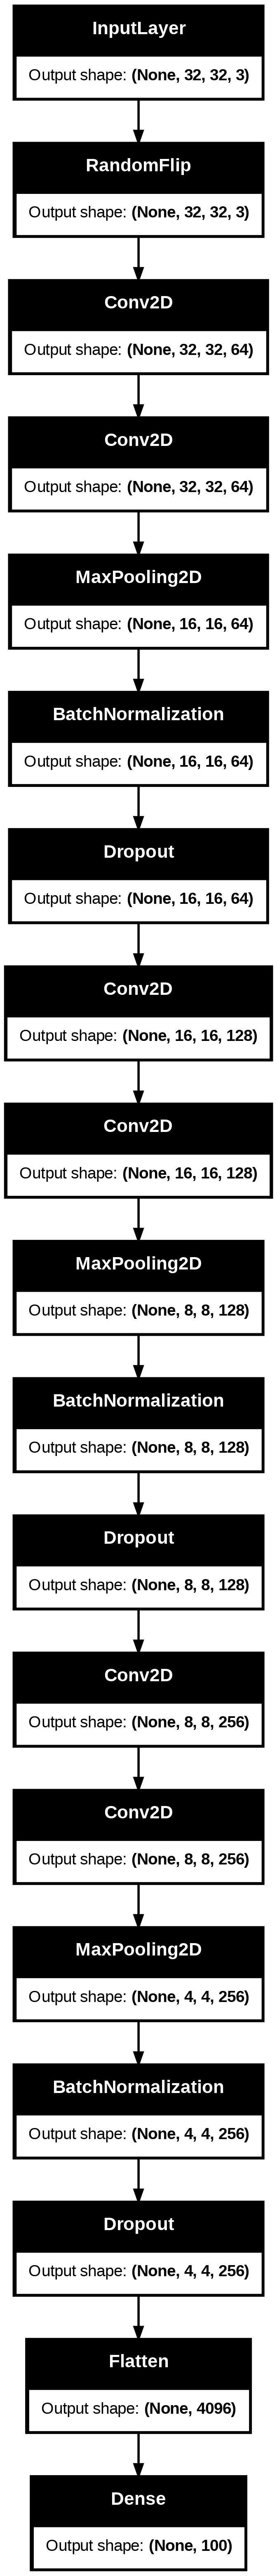

In [ ]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

* Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',     # 관측지표
                   min_delta=0,            # 임계값
                   patience=5,             # 몇 번 더 볼래
                   verbose=1,
                   restore_best_weights=True) # 최적 epoch 가중치로 되돌림

* .fit( )

In [ ]:
model.fit(train_x, train_y, validation_data=(val_x,val_y),
          epochs=10000, verbose=1,
          callbacks=[es])

Epoch 1/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.0616 - loss: 5.1823 - val_accuracy: 0.1237 - val_loss: 4.1389
Epoch 2/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1850 - loss: 3.5051 - val_accuracy: 0.1963 - val_loss: 3.4340
Epoch 3/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2648 - loss: 2.9543 - val_accuracy: 0.3088 - val_loss: 2.7701
Epoch 4/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3273 - loss: 2.6338 - val_accuracy: 0.3529 - val_loss: 2.5430
Epoch 5/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3731 - loss: 2.4302 - val_accuracy: 0.3702 - val_loss: 2.4748
Epoch 6/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4098 - loss: 2.2604 - val_accuracy: 0.3667 - val_loss: 2.4851
Epoch 7/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4446 - loss: 2.1042 - val_accuracy: 0.3788 - val_loss: 2.4390
Epoch 8/10000
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - a

* .evaluate( )

In [ ]:
model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5330 - loss: 1.8422


[1.8432157039642334, 0.5351999998092651]

* .predict( )

In [ ]:
y_pred = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


In [ ]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
# test_y_arg = np.argmax(test_y, axis=1)

# y_pred_arg = y_pred
test_y_arg = test_y

In [ ]:
y_pred_arg[0]

49

In [ ]:
test_y_arg[0]

array([49])

* 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy_score(test_y_arg, y_pred_arg)

0.5352

In [ ]:
print( classification_report(test_y_arg, y_pred_arg, target_names=list(label_dict.values())) )

               precision    recall  f1-score   support

        apple       0.69      0.83      0.75       100
aquarium_fish       0.68      0.62      0.65       100
         baby       0.49      0.48      0.48       100
         bear       0.49      0.22      0.30       100
       beaver       0.29      0.37      0.32       100
          bed       0.38      0.61      0.47       100
          bee       0.61      0.62      0.62       100
       beetle       0.59      0.54      0.57       100
      bicycle       0.76      0.56      0.64       100
       bottle       0.57      0.71      0.63       100
         bowl       0.50      0.34      0.40       100
          boy       0.45      0.21      0.29       100
       bridge       0.60      0.62      0.61       100
          bus       0.37      0.56      0.45       100
    butterfly       0.69      0.33      0.45       100
        camel       0.47      0.36      0.41       100
          can       0.72      0.53      0.61       100
       ca

## Visualization

* 실제 데이터 확인

idx = 8141
해당 인덱스의 이미지는 tractor
모델의 예측 : tractor
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 0.0
bear 0.0
beaver 0.0
bed 0.0
bee 0.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 0.0
boy 0.0
bridge 0.0
bus 0.0
butterfly 0.0
camel 0.0
can 0.0
castle 0.0
caterpillar 0.0
cattle 0.0
chair 0.0
chimpanzee 0.0
clock 0.0
cloud 0.0
cockroach 0.0
couch 0.0
cra 0.0
crocodile 0.0
cup 0.0
dinosaur 0.0
dolphin 0.0
elephant 0.0
flatfish 0.0
forest 0.0
fox 0.0
girl 0.0
hamster 0.0
house 0.0
kangaroo 0.0
keyboard 0.0
lamp 0.0
lawn_mower 0.0
leopard 0.0
lion 0.0
lizard 0.0
lobster 0.0
man 0.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 0.0
mushroom 0.0
oak_tree 0.0
orange 0.0
orchid 0.0
otter 0.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 0.0
plain 0.0
plate 0.0
poppy 0.0
porcupine 0.0
possum 0.0
rabbit 0.0
raccoon 0.0
ray 0.0
road 0.0
rocket 0.0
rose 0.0
sea 0.0
seal 0.0
shark 0.0
shrew 0.0
skunk 0.0
skyscraper 0.0
snail 0.0
snake 0.0
spider 0.0
squirrel 0.0
streetcar 0.0
s

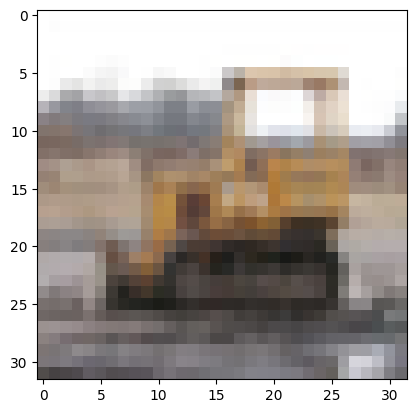

In [ ]:
rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx[0]]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx])
plt.show()

* 틀린 이미지만 확인해보기

In [ ]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

99000000

idx = 6932
해당 인덱스의 이미지는 chimpanzee
모델의 예측 : otter
모델의 클래스별 확률 : 
-------------------
apple 0.0
aquarium_fish 0.0
baby 0.0
bear 0.0
beaver 3.0
bed 0.0
bee 0.0
beetle 0.0
bicycle 0.0
bottle 0.0
bowl 1.0
boy 0.0
bridge 0.0
bus 0.0
butterfly 0.0
camel 0.0
can 7.0
castle 0.0
caterpillar 0.0
cattle 0.0
chair 0.0
chimpanzee 5.0
clock 0.0
cloud 0.0
cockroach 0.0
couch 0.0
cra 0.0
crocodile 0.0
cup 1.0
dinosaur 0.0
dolphin 2.0
elephant 0.0
flatfish 0.0
forest 0.0
fox 0.0
girl 1.0
hamster 0.0
house 0.0
kangaroo 0.0
keyboard 0.0
lamp 0.0
lawn_mower 0.0
leopard 0.0
lion 0.0
lizard 0.0
lobster 0.0
man 0.0
maple_tree 0.0
motorcycle 0.0
mountain 0.0
mouse 0.0
mushroom 0.0
oak_tree 0.0
orange 0.0
orchid 0.0
otter 25.0
palm_tree 0.0
pear 0.0
pickup_truck 0.0
pine_tree 6.0
plain 0.0
plate 0.0
poppy 0.0
porcupine 0.0
possum 0.0
rabbit 0.0
raccoon 0.0
ray 1.0
road 0.0
rocket 0.0
rose 0.0
sea 0.0
seal 14.0
shark 1.0
shrew 0.0
skunk 0.0
skyscraper 0.0
snail 4.0
snake 0.0
spider 0.0
squirrel 0.0
streetcar 0.

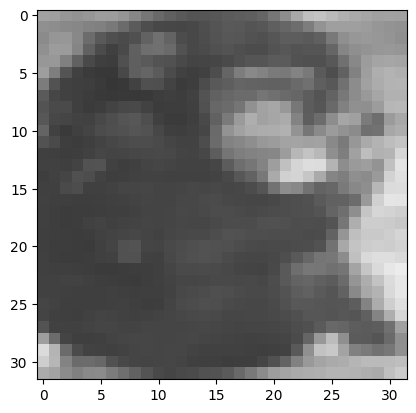

In [ ]:
rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {label_dict[test_idx[0]]}')
print(f'모델의 예측 : {label_dict[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate( list(label_dict.values()) ) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx] )
plt.show()